In [112]:
#KP/KD (x³)-(2*x²)+((1.00002+(0.02*kd))*x)-(0.02*kd)=0
%matplotlib notebook
from math import sqrt, acos, cos, pi
import cmath
import numpy as np
import pylab as pl
import scipy.spatial.distance as dist
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import matplotlib.transforms as mtransforms
import matplotlib.text as mtext
import _tkinter
from ipywidgets import interact, interactive, fixed

In [113]:
def plotSequence(y):
    n = np.linspace(0, y.size, y.size)
    plt.scatter(n, y)
    plt.plot([n, n], [np.zeros(n.size), y], color='gray', linestyle="--")
    return

In [114]:
def s3(a):
    if a<0:
        return -abs(a)**(1/3.)
    else: return a**(1/3.)

In [115]:
#Declaración de variables
thau=0.001
gamma=20.
kp=10.
kd=np.arange(0.9)
kd=np.linspace(0., 1., num=10)

#ax**3+bx**2+cx+d=0
a = 1.
b = -2.
c = 1+gamma*kp*thau**2+gamma*thau*kd
d = -gamma*thau*kd


In [116]:
def Cardano(a,b,c,d):
        
    p = c-b**2/3.
    q = (1/27.)*(27*d-9*b*c+2*b**3)
    
    D = (p/3.)**3+(q/2.)**2
    
    if D>0:
        A = s3(-q/2.+sqrt(D))
        B = s3(-q/2.-sqrt(D))
        y1 = A + B
        y2 = -(1/2.)*y1 + 1j*(sqrt(3)/2.)*(A-B)
        y3 = -(1/2.)*y1 - 1j*(sqrt(3)/2.)*(A-B)
    if D==0:
        if q==0: 
            if p==0:
                y1=0
                y2=0
                y3=0
        else:
            y1=A+B
            y2=-0.5*y1
            y3=y2
    if D<0:
        a=acos(sqrt((q**2/4.)/(-p**3/27.)))
        if q<=0:
            y1=2*sqrt(-p/3.)*cos(a/3.)
            y2=2*sqrt(-p/3.)*cos((a+2*pi)/3.)
            y3=2*sqrt(-p/3.)*cos((a+4*pi)/3.)
        else:
            y1=-2*sqrt(-p/3.)*cos(a/3.)
            y2=-2*sqrt(-p/3.)*cos((a+2*pi)/3.)
            y3=-2*sqrt(-p/3.)*cos((a+4*pi)/3.)

    x1 = y1 - b/3.
    x2 = y2 - b/3.
    x3 = y3 - b/3.
    
    return x1,x2,x3


In [117]:
x1 = np.zeros(kd.size,dtype='cfloat')
x2 = np.zeros(kd.size,dtype='cfloat')
x3 = np.zeros(kd.size,dtype='cfloat')

for i in range(kd.size):
    a = 1.
    b = -2.
    c = 1+gamma*kp*thau**2+gamma*thau*i
    d = -gamma*thau*i
    x1[i],x2[i],x3[i] = Cardano(a,b,c,d)


<IPython.core.display.Javascript object>


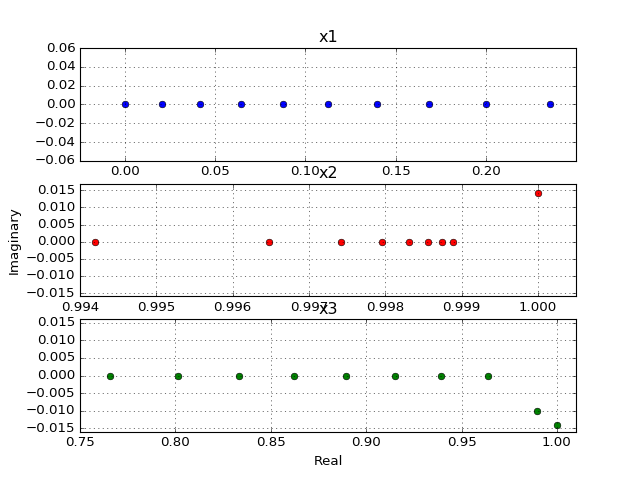

[ 0.00000000+0.j  0.02041250+0.j  0.04173293+0.j  0.06409439+0.j
  0.08766613+0.j  0.11266888+0.j  0.13939995+0.j  0.16827652+0.j
  0.19991672+0.j  0.23530859+0.j]
[ 1.00000000+0.01414214j  0.98979375+0.01j        0.99419007+0.j
  0.99647168+0.j          0.99742369+0.j          0.99796265+0.j
  0.99831245+0.j          0.99855867+0.j          0.99874169+0.j
  0.99888321+0.j        ]
[ 1.00000000+0.01414214j  0.98979375+0.01j        0.99419007+0.j
  0.99647168+0.j          0.99742369+0.j          0.99796265+0.j
  0.99831245+0.j          0.99855867+0.j          0.99874169+0.j
  0.99888321+0.j        ]


In [118]:
#plot
plt.figure(1)

plt.subplot(311)
plt.title('x1')
plt.plot(x1.real,x1.imag, 'bo')
plt.xlim(-0.025,0.25)
plt.grid(True)

plt.subplot(312)
plt.title('x2')
plt.plot(x2.real,x2.imag, 'ro')
plt.ylabel('Imaginary')
plt.xlim(0.994,1.0005)
plt.ylim(-0.016,0.017)
plt.grid(True)

plt.subplot(313)
plt.title('x3')
plt.plot(x3.real,x3.imag, 'go')
plt.xlabel('Real')
plt.xlim(0.75,1.01)
plt.ylim(-0.016,0.016)
plt.grid(True)

from matplotlib import pyplot as plt
plt.show()
print x1
print x2
print x2

<IPython.core.display.Javascript object>


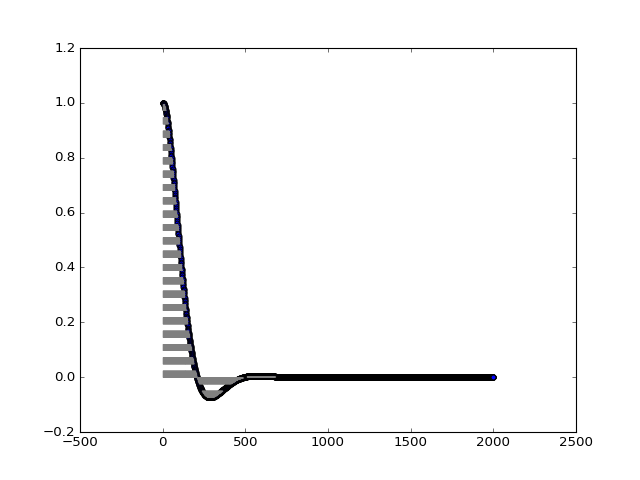

<function __main__.PDControlThirdOrderCar>

In [119]:

def PDControlThirdOrderCar(kp,kd):

    # start with the robot at 3m from beacon
    d0 = 1
    d1 = 1
    d2 = 1
    
    # This initializes the sequence
    n = 2000
    d = np.zeros(n)
    for i in range(n):
        if i == 0:  # first initial condition
            d[i] = d0
        if i == 1: # second initial condition
            d[i] = d1
        if i == 2: # third initial condition
            d[i] = d2
        if i > 2:
            d[i] = 2*d[i-1] - (1 + (gamma*kp*thau**2) + (thau*kd*gamma))*d[i-2] + (thau*kd*gamma)*d[i-3]
    # Plot the sequence
    plt.figure()
    plotSequence(d)
    return 


interact(PDControlThirdOrderCar, kp=(0,20.01,0.01), kd=(0,2,0.1))

